In [1]:
# LOAD PACKAGES

import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import rioxarray as rxr
import shapely as sp
from shapely.geometry import Point
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import os
import fnmatch
from osgeo import gdal 
print("packages loaded")

packages loaded


In [2]:
# SET IMAGE & SHAPEFILE DIRECTORY

# Pre-fire directory
dirImgLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171128T184719_N0206_R070_T11SKU_20171128T203222.SAFE/GRANULE/L1C_T11SKU_A003814_20171128T184714/IMG_DATA/'
print(os.listdir(dirImgLoc))

# Post-fire directory
dirImgLocPost = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171228T184749_N0206_R070_T11SKU_20171228T221718.SAFE/GRANULE/L1C_T11SKU_A004243_20171228T184751/IMG_DATA/'
print(os.listdir(dirImgLocPost))

# Shapefile directory
dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/'


#Output directory
dirOut = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/'

['T11SKU_20171128T184719_B11.jp2', 'T11SKU_20171128T184719_B04.jp2.aux.xml', 'T11SKU_20171128T184719_B09.jp2', 'T11SKU_20171128T184719_B07.jp2', 'T11SKU_20171128T184719_B8A.jp2', 'T11SKU_20171128T184719_B06.jp2.aux.xml', 'T11SKU_20171128T184719_B10.jp2.aux.xml', 'T11SKU_20171128T184719_B10.jp2', 'T11SKU_20171128T184719_B8A.jp2.aux.xml', 'T11SKU_20171128T184719_B12.jp2.aux.xml', 'T11SKU_20171128T184719_B02.jp2.aux.xml', 'T11SKU_20171128T184719_B01.jp2', 'T11SKU_20171128T184719_B06.jp2', 'T11SKU_20171128T184719_B08.jp2', 'T11SKU_20171128T184719_B05.jp2', 'T11SKU_20171128T184719_B02.jp2', 'T11SKU_20171128T184719_TCI.jp2', 'T11SKU_20171128T184719_B03.jp2.aux.xml', 'T11SKU_20171128T184719_B05.jp2.aux.xml', 'T11SKU_20171128T184719_B03.jp2', 'T11SKU_20171128T184719_B04.jp2', 'T11SKU_20171128T184719_B12.jp2']
['T11SKU_20171228T184749_B08.jp2', 'T11SKU_20171228T184749_B01.jp2', 'T11SKU_20171228T184749_B06.jp2', 'T11SKU_20171228T184749_B10.jp2', 'T11SKU_20171228T184749_B07.jp2', 'T11SKU_20171228

In [3]:
# GRAB SPECIFIC FILES

# Image identifiers
file_pattern = ("*B8A.jp2", "*B12.jp2")

# Find image that matches file pattern 
pre_file_list = [os.path.join(dirImgLoc, f) for f in os.listdir(dirImgLoc) if any(fnmatch.fnmatch(f, p) for p in file_pattern)]
print(pre_file_list)
#print(pre_file_list[0])
#print(pre_file_list[1])

post_file_list = [os.path.join(dirImgLocPost, f) for f in os.listdir(dirImgLocPost) if any(fnmatch.fnmatch(f, p) for p in file_pattern)]
print(post_file_list)
#print(post_file_list[0])
#print(post_file_list[1])

['/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171128T184719_N0206_R070_T11SKU_20171128T203222.SAFE/GRANULE/L1C_T11SKU_A003814_20171128T184714/IMG_DATA/T11SKU_20171128T184719_B8A.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171128T184719_N0206_R070_T11SKU_20171128T203222.SAFE/GRANULE/L1C_T11SKU_A003814_20171128T184714/IMG_DATA/T11SKU_20171128T184719_B12.jp2']
['/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171228T184749_N0206_R070_T11SKU_20171228T221718.SAFE/GRANULE/L1C_T11SKU_A004243_20171228T184751/IMG_DATA/T11SKU_20171228T184749_B8A.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/raw/S2B_MSIL1C_20171228T184749_N0206_R070_T11SKU_20171228T221718.SAFE/GRANULE/L1C_T11SKU_A004243_20171228T184751/IMG_DATA/T11SKU_20171228T184749_B12.jp2']


<xarray.DataArray (band: 1, y: 5490, x: 5490)>
array([[[0.07132353, 0.09559543, 0.06309878, ..., 0.10064717,
         0.12724014, 0.15983418],
        [0.03123972, 0.05534015, 0.07966805, ..., 0.12093863,
         0.12522604, 0.17349727],
        [0.0573338 , 0.05530145, 0.09519868, ..., 0.12209433,
         0.15066606, 0.16826266],
        ...,
        [0.4108527 , 0.4041298 , 0.37142858, ..., 0.28212896,
         0.2395781 , 0.20715494],
        [0.40331492, 0.40425533, 0.38317758, ..., 0.272418  ,
         0.25745645, 0.19250275],
        [0.40509915, 0.43108505, 0.4099379 , ..., 0.21821631,
         0.21668264, 0.16709912]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0


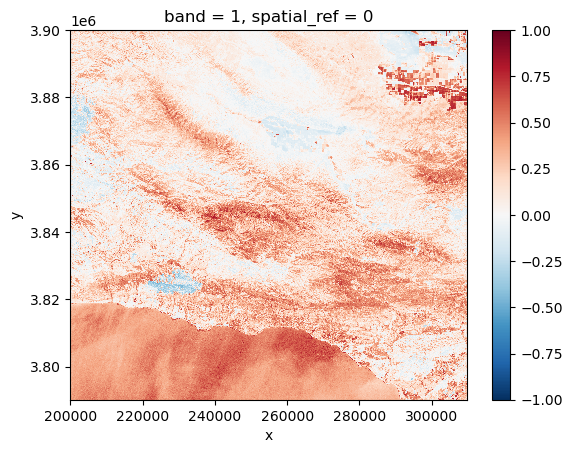

In [4]:
# OPEN RASTERS & CALCULATE THE PRE-FIRE NORMALIZED BURN RATIO

# Pre-fire nbr
pre_fire_nir = rxr.open_rasterio(pre_file_list[0], masked=True)
#print(pre_fire_nir)

pre_fire_swir = rxr.open_rasterio(pre_file_list[1], masked=True)
#print(pre_fire_swir)

pre_fire_nbr = (pre_fire_nir - pre_fire_swir) / (pre_fire_nir + pre_fire_swir)
print(pre_fire_nbr)
pre_fire_nbr.plot()

<xarray.DataArray (band: 1, y: 5490, x: 5490)>
array([[[ 0.22270742,  0.21726756,  0.21973239, ..., -0.11801242,
         -0.12678422, -0.12489522],
        [ 0.21473552,  0.21658692,  0.22245798, ..., -0.11385135,
         -0.11723904, -0.11365936],
        [ 0.21518987,  0.21493506,  0.21394508, ..., -0.11221179,
         -0.11065921, -0.11513102],
        ...,
        [ 0.82608694,  0.82857144,  0.737931  , ...,  0.30799136,
          0.2511896 ,  0.16929133],
        [ 0.8439716 ,  0.80689657,  0.7352941 , ...,  0.2179676 ,
          0.24088635,  0.19844358],
        [ 0.79856116,  0.7916667 ,  0.76119405, ...,  0.17285785,
          0.18797432,  0.14162561]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0


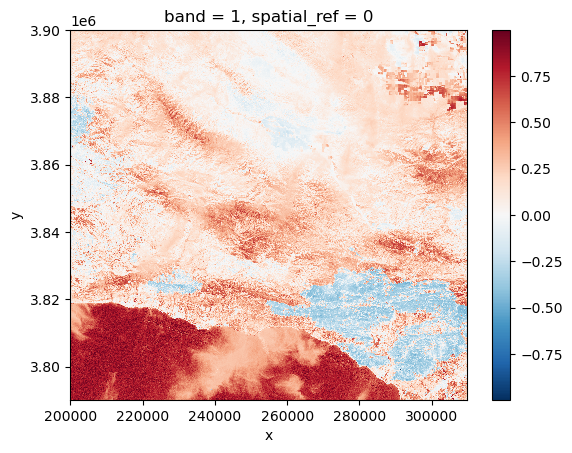

In [5]:
# OPEN RASTERS & CALCULATE THE POST-FIRE NORMALIZED BURN RATIO

# Post-fire nbr
post_fire_nir = rxr.open_rasterio(post_file_list[0], masked=True)
#print(post_fire_nir)

post_fire_swir = rxr.open_rasterio(post_file_list[1], masked=True)
#print(post_fire_swir)

post_fire_nbr = (post_fire_nir - post_fire_swir) / (post_fire_nir + post_fire_swir)
print(post_fire_nbr)
post_fire_nbr.plot()

<xarray.DataArray (band: 1, y: 5490, x: 5490)>
array([[[-0.15138389, -0.12167212, -0.15663362, ...,  0.2186596 ,
          0.25402436,  0.2847294 ],
        [-0.1834958 , -0.16124678, -0.14278993, ...,  0.23478998,
          0.24246508,  0.28715664],
        [-0.15785608, -0.1596336 , -0.1187464 , ...,  0.23430613,
          0.26132527,  0.28339368],
        ...,
        [-0.41523424, -0.42444164, -0.36650243, ..., -0.0258624 ,
         -0.01161149,  0.03786361],
        [-0.4406567 , -0.40264124, -0.35211653, ...,  0.05445039,
          0.01657011, -0.00594082],
        [-0.393462  , -0.36058164, -0.35125616, ...,  0.04535846,
          0.02870832,  0.02547351]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0


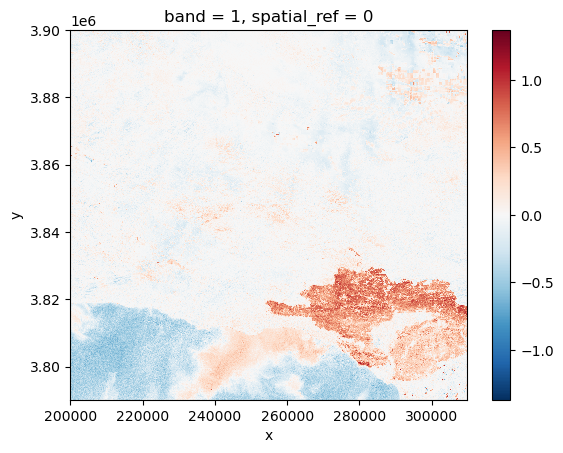

In [6]:
# CALCULATE THE DIFFERENCED NORMALIZED BURN RATIO

dnbr = pre_fire_nbr - post_fire_nbr
print(dnbr)
dnbr.plot()

In [8]:
# LOOP OVER SHAPEFILE DIRECTORY & OUTPUT GTIFF FILES

for filename in os.listdir(dirPolyLoc):
    if filename.endswith('.shp'):
        # Load the shapefile using geopandas
        shape = gpd.read_file(os.path.join(dirPolyLoc, filename))

        # Clip the DNBR raster by the shapefile
        dnbr_clip = dnbr.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
        #clip_stats = np.mean(dnbr_clip)
        #print(clip_stats)
        
        # Output the clipped DNBR raster with the correct filename
        output_filename = os.path.splitext(filename)[0] + '_dnbr.tif'
        dnbr_clip.rio.to_raster(os.path.join(dirOut, output_filename), driver='GTIFF')